<a href="https://www.kaggle.com/code/msnerkiz/employee-churn?scriptVersionId=93087278" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

# 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
!pip install pyclustertend

In [2]:
!pip install yellowbrick

### Importing Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10, 6)
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [5]:
# df=pd.read_csv("HR_Dataset.csv")
df=pd.read_csv("../input/hr-dataset/HR_Dataset.csv")
df.rename({'Work_accident':'work_accident','Departments ':'departments'}, axis='columns', inplace=True)
df2 = df.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
for col in df.dtypes[df.dtypes == object].index:
    print(f"Value counts for column '{col}'")
    print(" ")
    print(df[col].value_counts())
    print(" ")
    print("============================")
    print(" ")

Value counts for column 'departments'
 
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64
 
 
Value counts for column 'salary'
 
low       5740
medium    5261
high       990
Name: salary, dtype: int64
 
 


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.000,0.630,0.241,0.090,0.480,0.660,0.820,1.000
last_evaluation,11991.000,0.717,0.168,0.360,0.570,0.720,0.860,1.000
number_project,11991.000,3.803,1.163,2.000,3.000,4.000,5.000,7.000
average_montly_hours,11991.000,200.474,48.728,96.000,157.000,200.000,243.000,310.000
time_spend_company,11991.000,3.365,1.330,2.000,3.000,3.000,4.000,10.000
work_accident,11991.000,0.154,0.361,0.000,0.000,0.000,0.000,1.000
left,11991.000,0.166,0.372,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,11991.000,0.017,0.129,0.000,0.000,0.000,0.000,1.000


In [12]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [13]:
df.work_accident.value_counts()

0    10141
1     1850
Name: work_accident, dtype: int64

In [14]:
df[df.promotion_last_5years == 1].left.value_counts()

0    195
1      8
Name: left, dtype: int64

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [15]:
left = df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


In [16]:
# sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

# 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

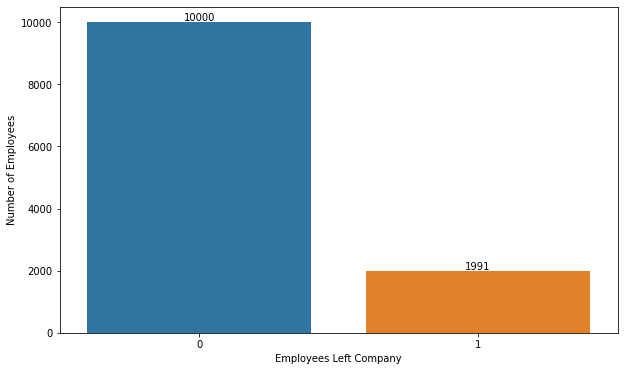

In [17]:
left_count=df.groupby('left').count()
ax=sns.barplot(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees') 
ax.bar_label(ax.containers[0])
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


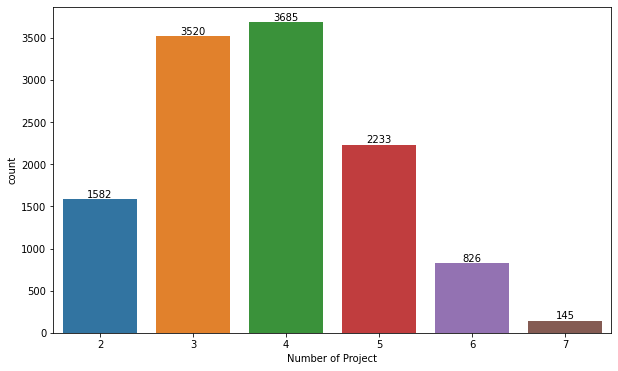

In [19]:
ax=sns.countplot(data= df , x = "number_project")
plt.xlabel('Number of Project')
ax.bar_label(ax.containers[0])
plt.show()

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


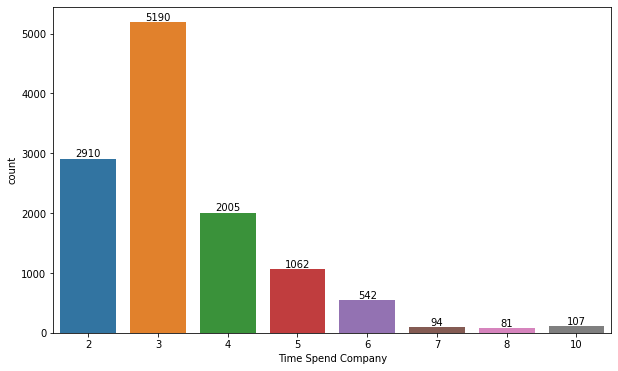

In [20]:
ax=sns.countplot(data= df , x = "time_spend_company")
plt.xlabel('Time Spend Company')
ax.bar_label(ax.containers[0])
plt.show()

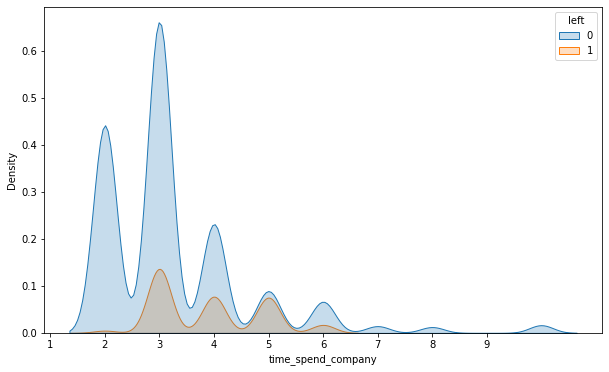

In [21]:
sns.kdeplot(df['time_spend_company'], hue=df['left'], shade=True)
plt.xticks(range(1,10));

### Subplots of Features

You can use the methods of the matplotlib.

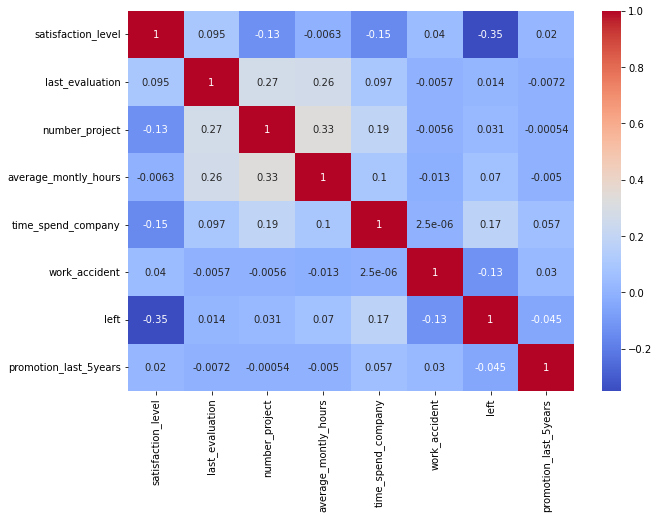

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");
#aylık çalışma saati ve proje sayısı arasında


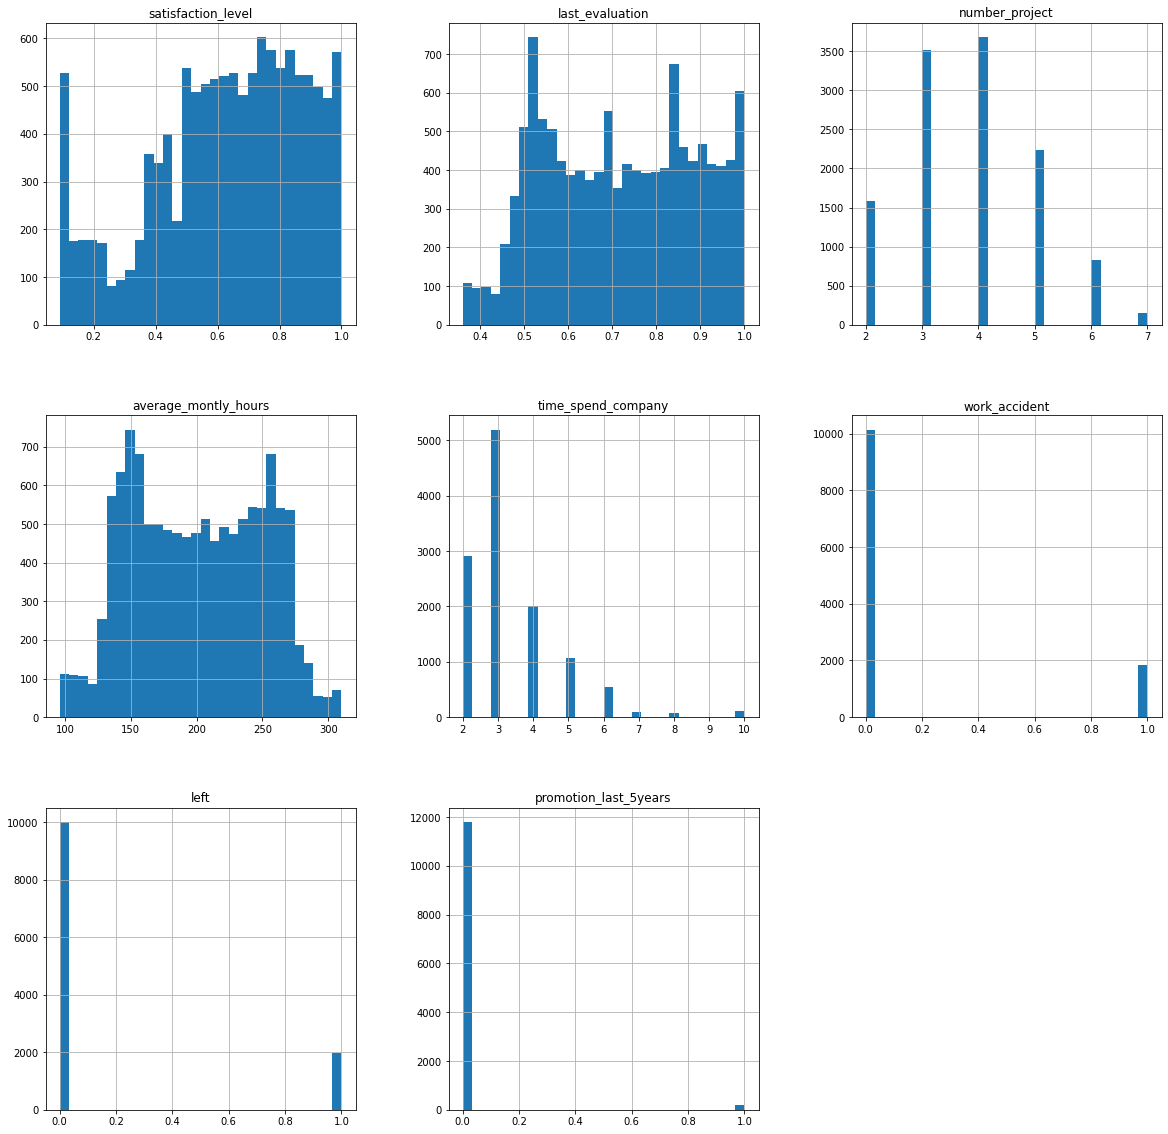

In [23]:
df.hist(bins = 30, figsize = (20,20));

In [24]:
# sns.pairplot(df.drop(['departments','salary'],axis=1),hue='left');

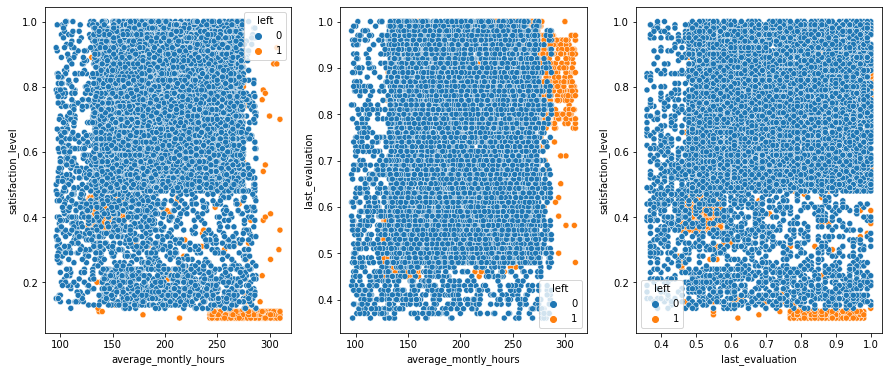

In [25]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.scatterplot(df['average_montly_hours'], df['satisfaction_level'],hue=df['left']);

plt.subplot(1,3,2)
sns.scatterplot(df['average_montly_hours'], df['last_evaluation'],hue=df['left']);

plt.subplot(1,3,3)
sns.scatterplot(df['last_evaluation'], df['satisfaction_level'],hue=df['left']);


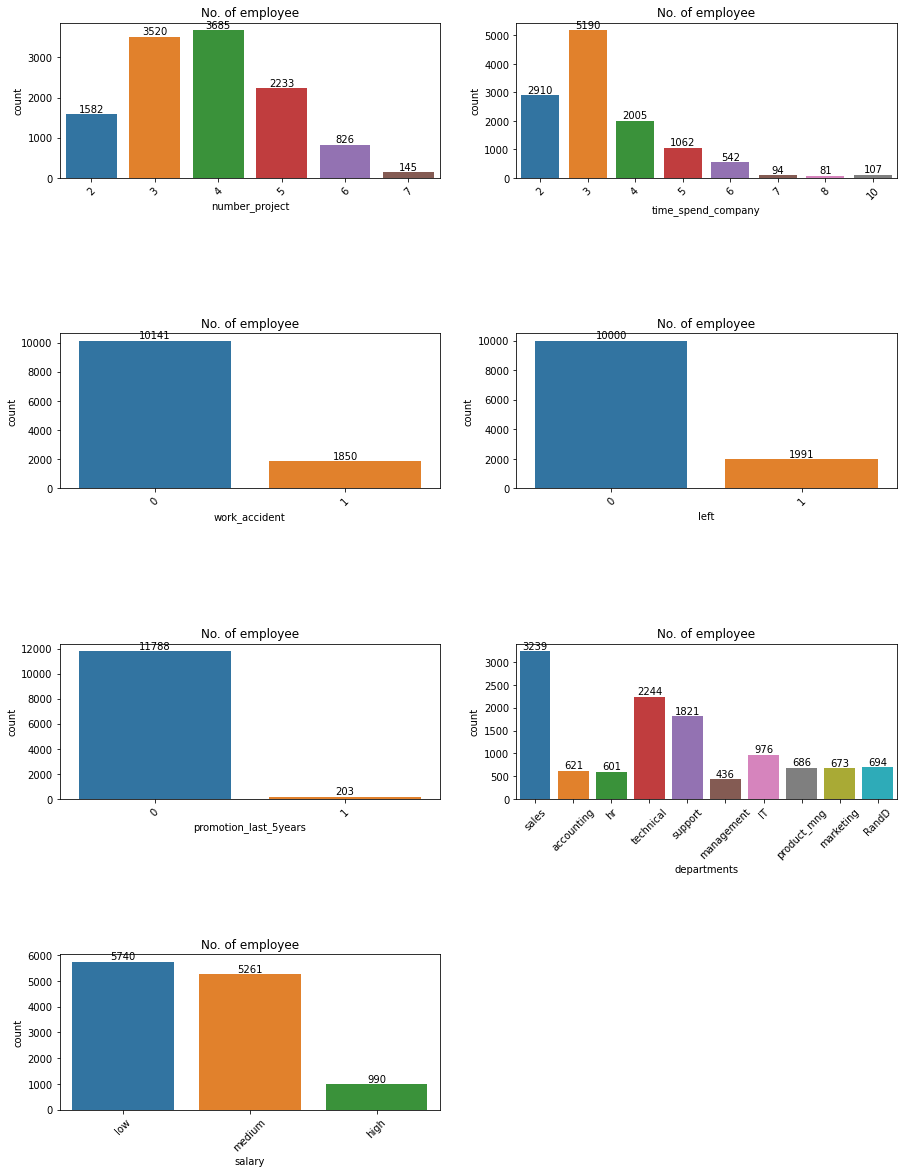

In [26]:
features=['number_project','time_spend_company','work_accident','left', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x=j,data = df)
    plt.xticks(rotation=45)
    plt.title("No. of employee")
    ax.bar_label(ax.containers[0])

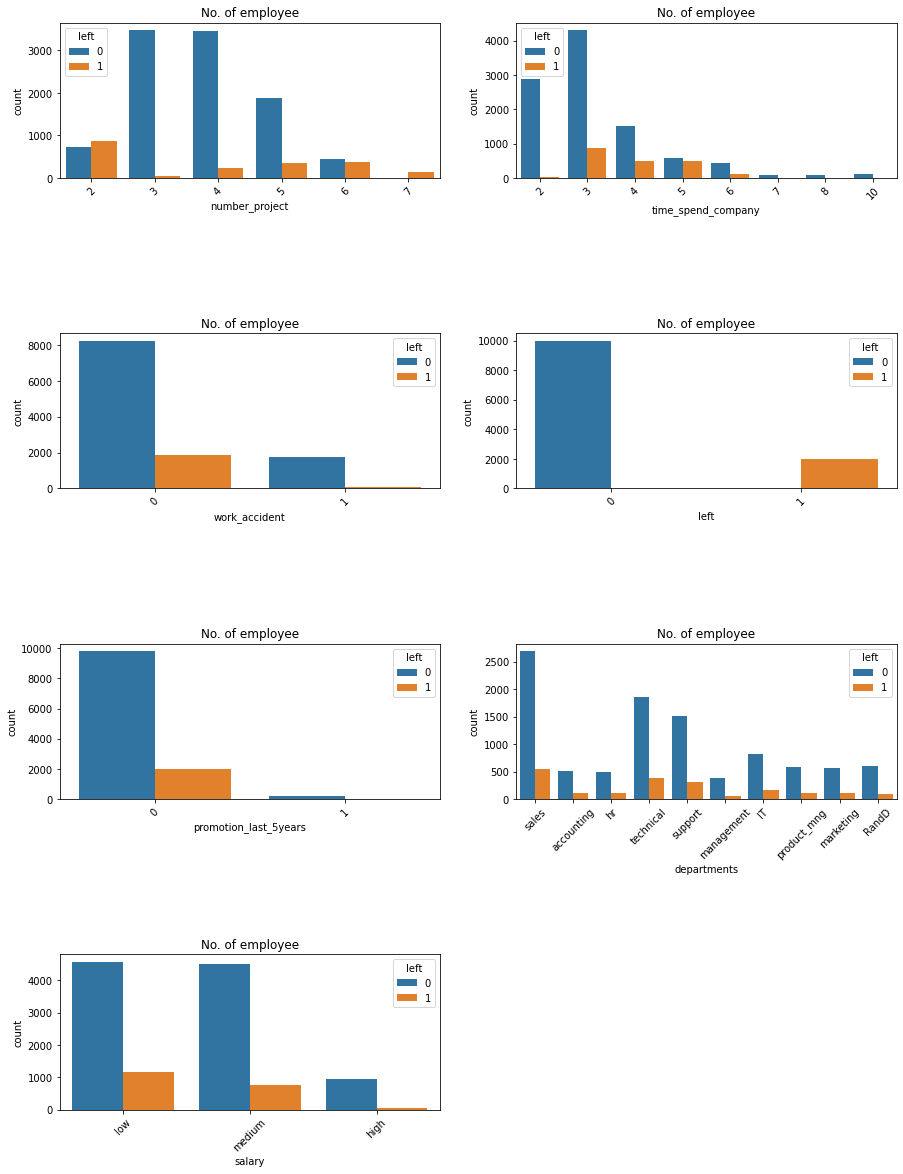

In [27]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax=sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=45)
    plt.title("No. of employee")
#     ax.bar_label(ax.containers[0])

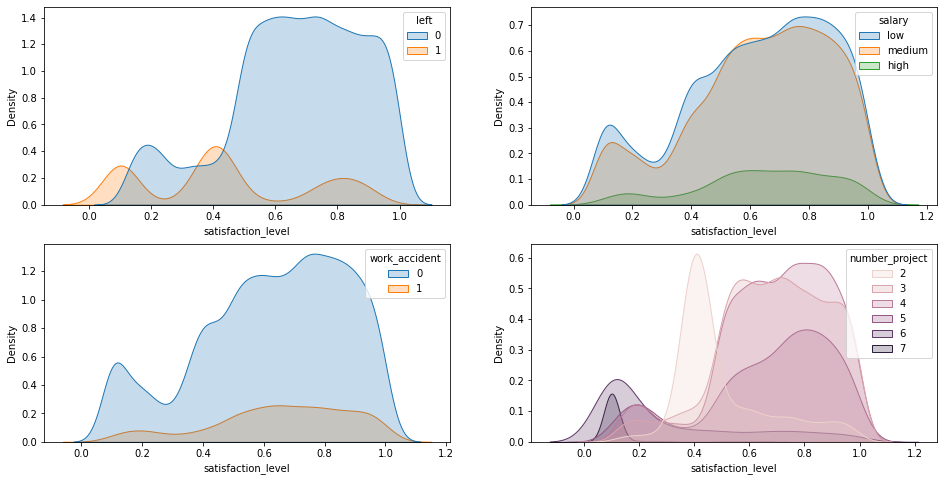

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.kdeplot(df['satisfaction_level'], hue=df['left'], shade=True)
plt.subplot(222)
sns.kdeplot(df['satisfaction_level'], hue=df['salary'], shade=True)
plt.subplot(223)
sns.kdeplot(df['satisfaction_level'], hue=df['work_accident'], shade=True)
plt.subplot(224)
sns.kdeplot(df['satisfaction_level'], hue=df['number_project'], shade=True)
plt.show()

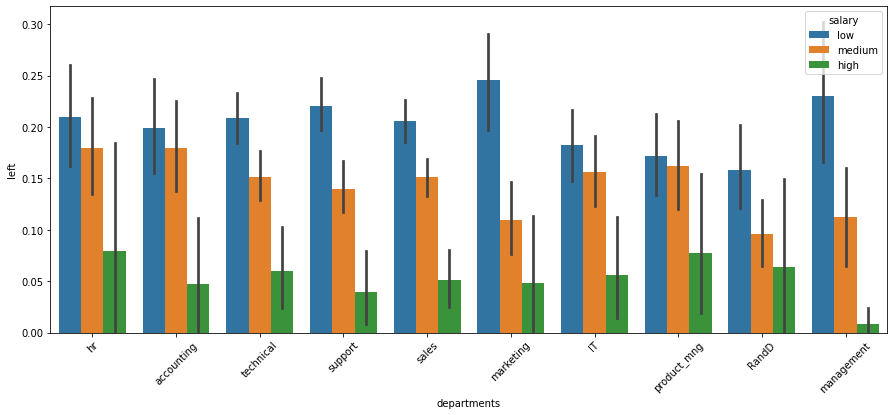

In [29]:
plt.figure(figsize=(15,6))
result = df.groupby(["departments"])['left'].aggregate(np.mean).reset_index().sort_values('left',ascending=False)
sns.barplot(x='departments', y="left", data=df, hue='salary',order=result['departments'])
plt.xticks(rotation=45)
plt.show()

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='time_spend_company', ylabel='departments'>

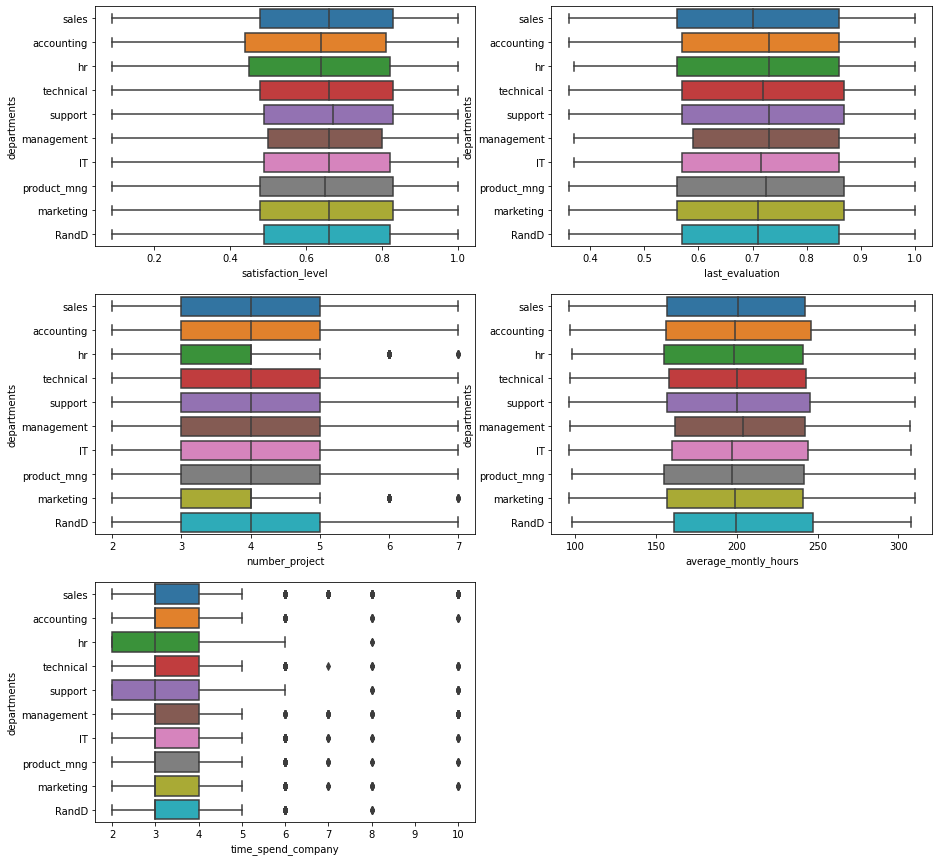

In [31]:
plt.figure(figsize=(15, 15))

plt.subplot(3,2,1)
sns.boxplot(x = 'satisfaction_level', y = 'departments', data = df)

plt.subplot(3,2,2)
sns.boxplot(x = 'last_evaluation', y = 'departments', data = df)

plt.subplot(3,2,3)
sns.boxplot(x = 'number_project', y = 'departments', data = df)

plt.subplot(3,2,4)
sns.boxplot(x = 'average_montly_hours', y = 'departments', data = df)

plt.subplot(3,2,5)
sns.boxplot(x = 'time_spend_company', y = 'departments', data = df)

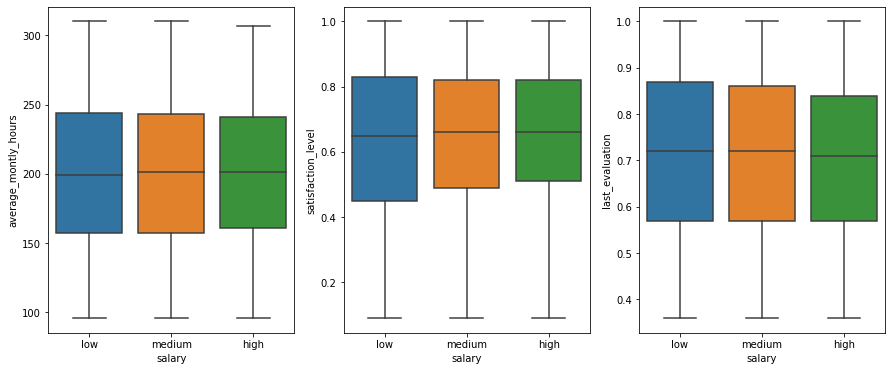

In [32]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(df['salary'], df['average_montly_hours'])

plt.subplot(1,3,2)
sns.boxplot(df['salary'], df['satisfaction_level'])

plt.subplot(1,3,3)
sns.boxplot(df['salary'], df['last_evaluation'])
plt.show()

# 3. Data Pre-Processing

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [33]:
df[['departments','salary']].sample(5)

,departments,salary
9675,technical,low
2238,sales,low
1640,technical,low
4470,technical,high
2249,technical,medium


In [34]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [35]:
df2.drop_duplicates().salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [36]:
df.departments.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

In [37]:
df2.drop_duplicates().departments.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

In [38]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['departments']=le.fit_transform(df['departments'])

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,7,1
1,0.800,0.860,5,262,6,0,1,0,7,2
2,0.110,0.880,7,272,4,0,1,0,7,2
3,0.720,0.870,5,223,5,0,1,0,7,1
4,0.370,0.520,2,159,3,0,1,0,7,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments            11991 non-null  int64  
 9   salary                 11991 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.3 MB


In [41]:
df[["salary"]].value_counts()

salary
1         5740
2         5261
0          990
dtype: int64

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,7,1
1,0.800,0.860,5,262,6,0,1,0,7,2
2,0.110,0.880,7,272,4,0,1,0,7,2
3,0.720,0.870,5,223,5,0,1,0,7,1
4,0.370,0.520,2,159,3,0,1,0,7,1


In [43]:
# def NormalizeData(df):
#     return (df - np.min(df)) / (np.max(df) - np.min(df))

In [44]:
# df_norm = NormalizeData(df)

# print(df_norm)

In [45]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,7,1
1,0.800,0.860,5,262,6,0,1,0,7,2
2,0.110,0.880,7,272,4,0,1,0,7,2
3,0.720,0.870,5,223,5,0,1,0,7,1
4,0.370,0.520,2,159,3,0,1,0,7,1


In [46]:
from sklearn.preprocessing import StandardScaler

df3=df.drop('left',axis=1)
target=df['left']

scale = StandardScaler()
df_scaled = scale.fit_transform(df3[df3.columns])

df_scaled = pd.DataFrame(df_scaled, columns=df3.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,-1.036,-1.109,-1.550,-0.892,-0.274,-0.427,-0.131,0.389,-0.567
1,0.707,0.851,1.029,1.263,1.981,-0.427,-0.131,0.389,1.025
2,-2.156,0.970,2.749,1.468,0.477,-0.427,-0.131,0.389,1.025
3,0.375,0.911,1.029,0.462,1.229,-0.427,-0.131,0.389,-0.567
4,-1.077,-1.168,-1.550,-0.851,-0.274,-0.427,-0.131,0.389,-0.567


In [47]:
# sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)[source]

# 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [48]:
X = df.copy()

In [49]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,7,1
1,0.800,0.860,5,262,6,0,1,0,7,2
2,0.110,0.880,7,272,4,0,1,0,7,2
3,0.720,0.870,5,223,5,0,1,0,7,1
4,0.370,0.520,2,159,3,0,1,0,7,1


In [50]:
X.shape

(11991, 10)

In [51]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=2, random_state=42)

In [52]:
K_means_model.fit(X.drop('left',axis=1))

KMeans(n_clusters=2, random_state=42)

In [53]:
K_means_model.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [54]:
X["Classes"] = K_means_model.labels_

In [55]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary,Classes
0,0.380,0.530,2,157,3,0,1,0,7,1,0
1,0.800,0.860,5,262,6,0,1,0,7,2,1
2,0.110,0.880,7,272,4,0,1,0,7,2,1
3,0.720,0.870,5,223,5,0,1,0,7,1,1
4,0.370,0.520,2,159,3,0,1,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,0,1,4,0,1
11996,0.740,0.950,5,266,10,0,0,1,4,0,1
11997,0.850,0.540,3,185,10,0,0,1,4,0,0
11998,0.330,0.650,3,172,10,0,0,1,5,0,0


### 4.1 Cluster Analysis - Hopkins Test

Data kumeleme islemi icin uygun mu? Random olarak mi dagilmis? Bunun icin Hopkins test yapilir.

In [56]:
## Yukarida ekledigimiz class' i cikarip datayi eski haline getirdik;

X = X.drop(["Classes","left"], axis =1)

In [57]:
from pyclustertend import hopkins

In [58]:
X.shape

(11991, 9)

In [59]:
hopkins(X, X.shape[0])

0.31623664677066227

In [60]:
hopkins(X, 60)   # Subsample ile de yakin bir skor elde ettik. 

# Burada kümelemeye yatkınlık olduğunu gördük.
# Çünkü değerimiz 0 a daha yakın. (0.5'in altında olması iyi bir şey)

0.3206770024766372

### 4.2 The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [61]:
ssd = []                                                 # sum of squared distance

K = range(2,10)                                          # k icin aralik.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)                                         # Her yeni k sayisina gore modeli egit.
    ssd.append(model.inertia_)

## Elbow metoduna gore; keskin dususun durdugu ilk noktadaki k degerini secmek gerekir.
 # Sonraki sert dususler dikkate alinmaz.

__model.inertia__ --------> Olusturulan her kume icin kume elemanlarinin merkeze olan uzakliklarini olcer ve bunlarin karesini alir. Cikan degerleri toplar ve ortalamasini alir.

**--** Kumelerden hesaplanan degerler ne kadar kucukse, kume elemanlari merkeze o kadar yakin demektir. Inertia degeri yuksek cikarsa kume elemanlari genis alana yayilmis demektir.

**----------------------------------------**

**--** En az inertia degeri hangi k degerinde cikarsa o k degerini secmek mantikli olur.

**--** Fakat elbow metonuda göre keskin düşüşün ilk durduğu noktayı almamız gerekiyor.

Text(0.5, 1.0, 'elbow method')

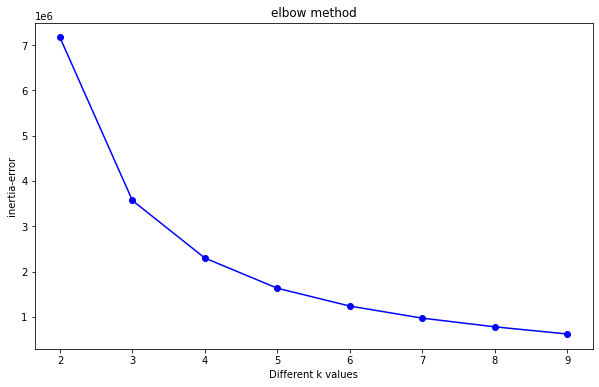

In [62]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [63]:
# ssd

In [64]:
# pd.Series(ssd).diff()

In [65]:
## Yukaridaki negatif degerleri pozitife cevirmek icin basina (-) isareti koyduk.
## Kume sayisini gorebilmek icin rename ile indexi 1' den baslattik :

df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,3598264.968
3,1271017.267
4,665331.169
5,394065.865
6,266298.912
7,191947.158
8,157635.242


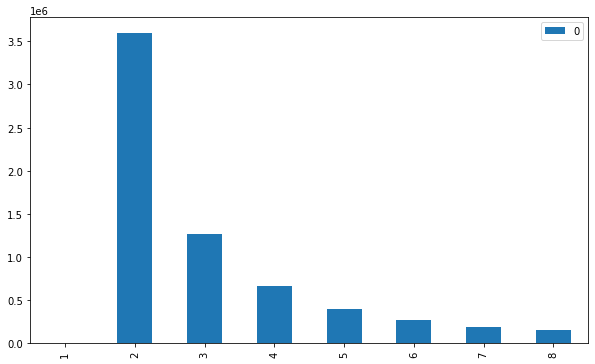

In [66]:
df_diff.plot(kind='bar'); ## Burada da keskin düşüşün durduğu noktayı (k=3) görebiliyoruz.

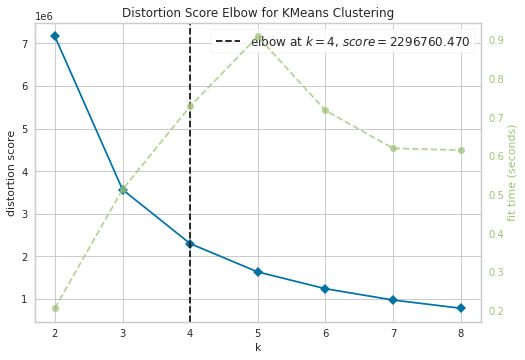

In [67]:
## Yellowbrick ile de bakmak istedik, Modelimizi kurup k için aralık belirledik.
 # Yellowbrick k=4 değerini seçmiş. k=4'i daha anlamlı bulmuş.
    
    
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

**==** Iki farkli algoritmadan sonuc olarak iki farkli k degeri geldi. Bazen bu yontemlerle buldugumuz k degerleri bile guvenilir olmayabilir. Datada cok daha fazla kume olabilir, ic ice gecmis datalarda bulunan k degeri yaniltici olabilir. Boyle durumlarda uzman destegi almak gerekir.

### 4.3 Silhouette Analysis

**--**Silhouette, yapilan kumelemenin kalitesini olcen bir skorlamadir.

**--**Silhouette kumelerin hem kendi iclerinde ne kadar siki bir sekilde kumelendigini hem de diger kumeye ne kadar uzak oldugunu olcer. Bu yuzden modelimizin kalitesini olcmek icin bu metodu kullanacagiz.

In [68]:
from sklearn.metrics import silhouette_score

**--** Silhouette Analizde önce data sonra ise label sayısı verilir. Biz yukarida 5 label secmistik (n_clusters=5)

**--** Bu deger 1' e ne kadar yakinsa kumeleme o kadar iyi demektir. Bu skorun iyi olup olmadigini diger kume sayilari ile kiyaslayarak karar verecegiz;

In [69]:
silhouette_score(X, K_means_model.labels_) 

0.6289620464855527

In [70]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6289620464855527
For n_clusters=3, the silhouette score is 0.5672257970858855
For n_clusters=4, the silhouette score is 0.5202922452435457
For n_clusters=5, the silhouette score is 0.4881731188507455
For n_clusters=6, the silhouette score is 0.46809455429708985
For n_clusters=7, the silhouette score is 0.46997748772767073
For n_clusters=8, the silhouette score is 0.4704979277635358


**--** Burada en iyi class'ın 2 olduğunu iç içe geçmiş ve diğer kümelerden hafif bi ayrık olmasından anlayabiliyoruz.

**--** Kırmızı çizginin anlamı n_cluster=3 için bulduğumuz 3 kümenin Silhlouette Score ortalamasıdır.

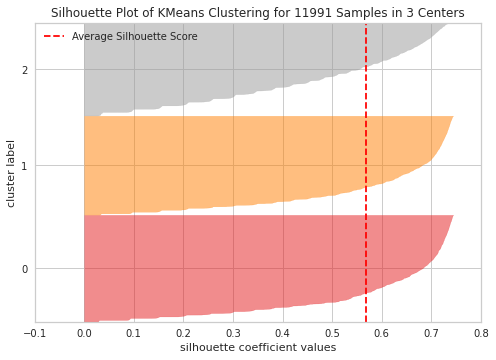

In [71]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [72]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,1,0,7,1
1,0.800,0.860,5,262,6,0,1,0,7,2
2,0.110,0.880,7,272,4,0,1,0,7,2
3,0.720,0.870,5,223,5,0,1,0,7,1
4,0.370,0.520,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,0,1,4,0
11996,0.740,0.950,5,266,10,0,0,1,4,0
11997,0.850,0.540,3,185,10,0,0,1,4,0
11998,0.330,0.650,3,172,10,0,0,1,5,0


In [73]:
X = df.drop('left',axis=1)
y = df['left']

In [74]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# permormance display includesmodel.predict function
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify = y)

In [77]:
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### #Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier


#### Model Building

In [80]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1], 
              "max_features" : ['sqrt',None, 2, 4],
              "learning_rate": [0.01, 0.1], 
              'max_depth':[3, 4, 5]} 


gb_model = GradientBoostingClassifier(random_state=101)
gb_model_grid = GridSearchCV(gb_model, param_grid, scoring="recall",
                             verbose=0, n_jobs=-1).fit(X_train, y_train)
gb_model_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'subsample': 1}

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [81]:
gb_model_cv = GradientBoostingClassifier(random_state=101, **gb_model_grid.best_params_)

scores = cross_validate(gb_model_cv, X_train, y_train, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy    0.982
test_precision   0.966
test_recall      0.925
test_f1          0.945
test_roc_auc     0.984
dtype: float64

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

#### Prediction

In [82]:
eval_metric(gb_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2985   16]
 [  44  553]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.97      0.93      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6968   31]
 [  99 1295]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



### #KNeighbors Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

#### Model Building

In [84]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [85]:
param_grid = {'knn__n_neighbors': range(1, 30), 
              "knn__p": [1,2], 
              "knn__weights": ['uniform', "distance"]}


In [86]:
knn_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'knn', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [87]:
knn_model_grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='recall')
knn_model_grid.fit(X_train, y_train)
knn_model_grid.best_params_

{'knn__n_neighbors': 6, 'knn__p': 1, 'knn__weights': 'distance'}

#### Evaluating Model Performance

In [88]:
test_error_rates = []
train_error_rates = []


for k in range(1, 30):

    operations = [("scaler", StandardScaler()),
                  ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn = Pipeline(steps=operations)

    knn.fit(X_train, y_train)

    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    test_error = 1 - recall_score(y_test, y_pred_test)
    train_error = 1 - recall_score(y_train, y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

Text(0, 0.5, 'Error Rate')

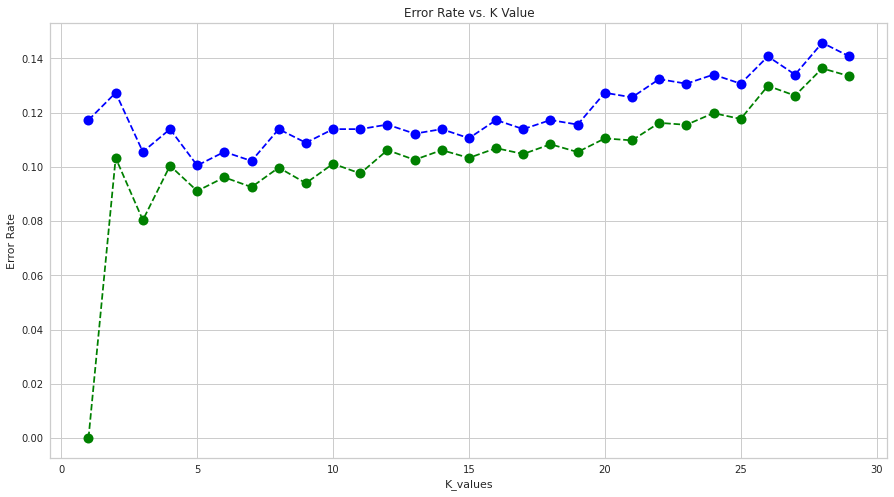

In [89]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',markerfacecolor='blue', markersize=10)
plt.plot(range(1, 30), train_error_rates, color='green', linestyle='--', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

#### Prediction

In [90]:
eval_metric(knn_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2926   75]
 [  60  537]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.88      0.90      0.89       597

    accuracy                           0.96      3598
   macro avg       0.93      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



### #Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

#### Model Building

In [92]:
param_grid = {'n_estimators': [64, 128, 300],
              'max_features': [2, 3, 4, "auto"],
              'max_depth': [2, 3, 4],
              'min_samples_split': [2, 3]}

rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model_grid = GridSearchCV(rf_model, param_grid, scoring="recall", n_jobs=-1, verbose=0).fit(X_train, y_train)

In [93]:
rf_model_grid.best_params_

{'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 128}

#### Evaluating Model Performance

In [94]:
rf_model_cv = RandomForestClassifier(class_weight="balanced", random_state=101,**rf_model_grid.best_params_)

scores = cross_validate(rf_model_cv, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.942
test_precision   0.768
test_recall      0.933
test_f1          0.842
dtype: float64

In [95]:
df_feature_importance = pd.DataFrame(index=X.columns, data=rf_model_grid.best_estimator_.feature_importances_,
                      columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_feature_importance

,Feature Importance
satisfaction_level,0.349
time_spend_company,0.296
number_project,0.150
average_montly_hours,0.111
last_evaluation,0.089
work_accident,0.004
salary,0.000
departments,0.000
promotion_last_5years,0.000


#### Prediction

In [96]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2837  164]
 [  43  554]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.96      3001
           1       0.77      0.93      0.84       597

    accuracy                           0.94      3598
   macro avg       0.88      0.94      0.90      3598
weighted avg       0.95      0.94      0.94      3598


Train_Set
[[6637  362]
 [  91 1303]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6999
           1       0.78      0.93      0.85      1394

    accuracy                           0.95      8393
   macro avg       0.88      0.94      0.91      8393
weighted avg       0.95      0.95      0.95      8393



## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [97]:
import pickle 


In [98]:
pickle_out = open("KNeighborsClassifier.pkl", "wb")
pickle.dump(knn_model_grid, pickle_out)
pickle_out.close()

In [99]:
pickle_out = open("RandomForestClassifier.pkl", "wb")
pickle.dump(rf_model_grid, pickle_out)
pickle_out.close()

In [100]:
pickle_out = open("GradientBoostingClassifier.pkl", "wb")
pickle.dump(gb_model_grid, pickle_out)
pickle_out.close()

In [101]:
scaler=StandardScaler() 
X_train_scaled=scaler.fit(X_train)
pickle.dump(X_train_scaled, open("my_scaler_knn.pkl", 'wb'))

### Save and Export Variables as .pkl

In [102]:
columns=X.columns
pickle.dump(columns, open("my_columns.pkl", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___